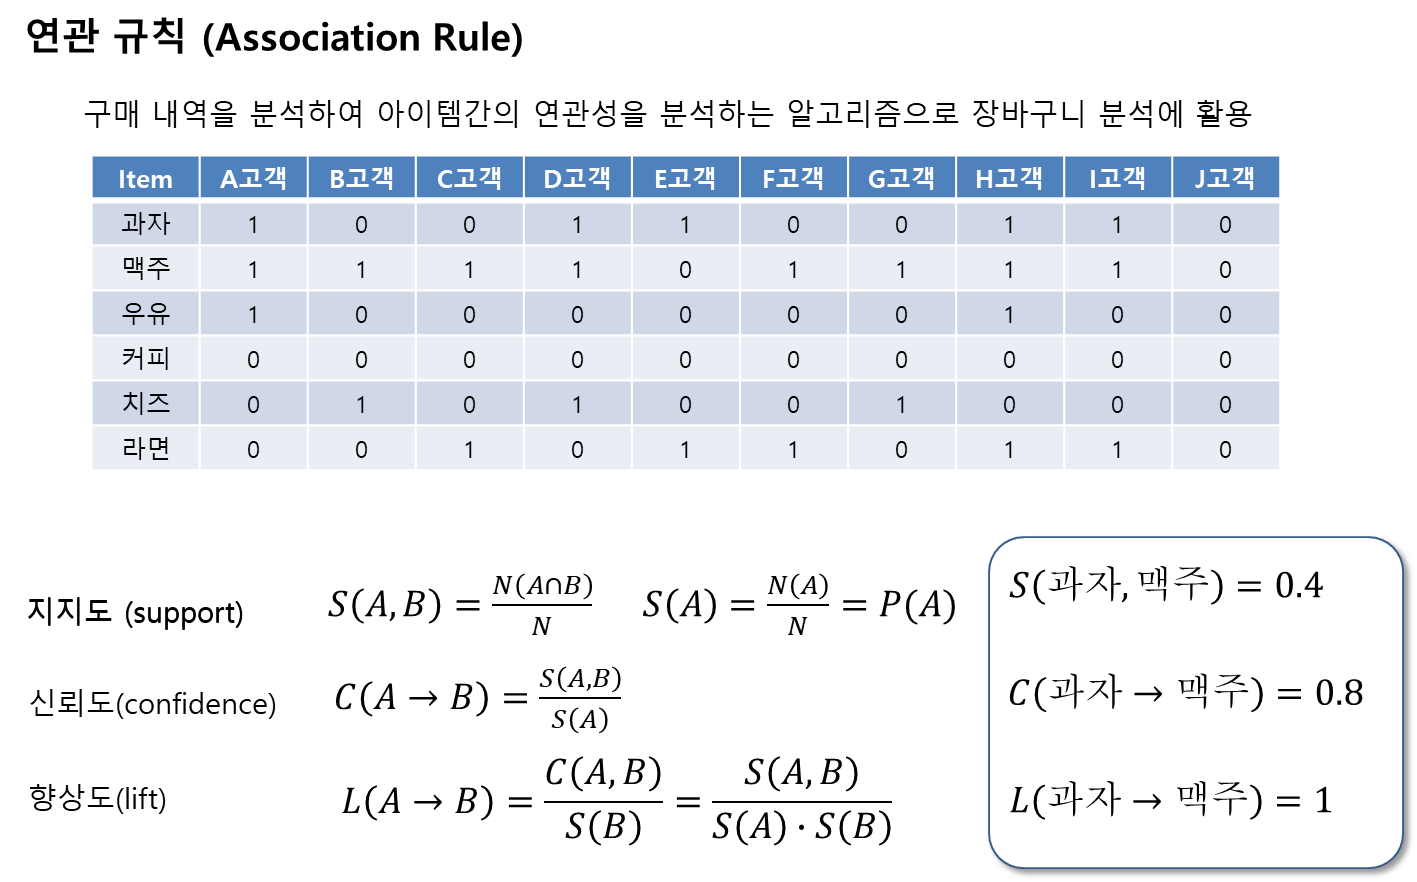

In [ ]:
# prompt: 연관규칙의 지지도 신뢰도 향상도 계산 코드

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample transaction data (replace with your actual data)
data = {'TransactionID': [1, 2, 3, 4, 5],
        'Items': [['A', 'B', 'C'], ['A', 'B', 'D'], ['B', 'E'], ['A', 'C', 'E'], ['B', 'C', 'E']]}
df = pd.DataFrame(data)

df

In [ ]:

# Create a one-hot encoded DataFrame
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = pd.DataFrame()
for index, row in df.iterrows():
    transaction = list(set(row['Items']))
    for item in transaction:
        basket_sets.loc[index, item] = 1

basket_sets = basket_sets.fillna(0)

# Find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

frequent_itemsets

In [ ]:

# Generate association rules
# Added the 'antecedents' column from the frequent_itemsets DataFrame as num_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0, support_only=False, num_itemsets=[frequent_itemsets['itemsets'].apply(len)])

rules

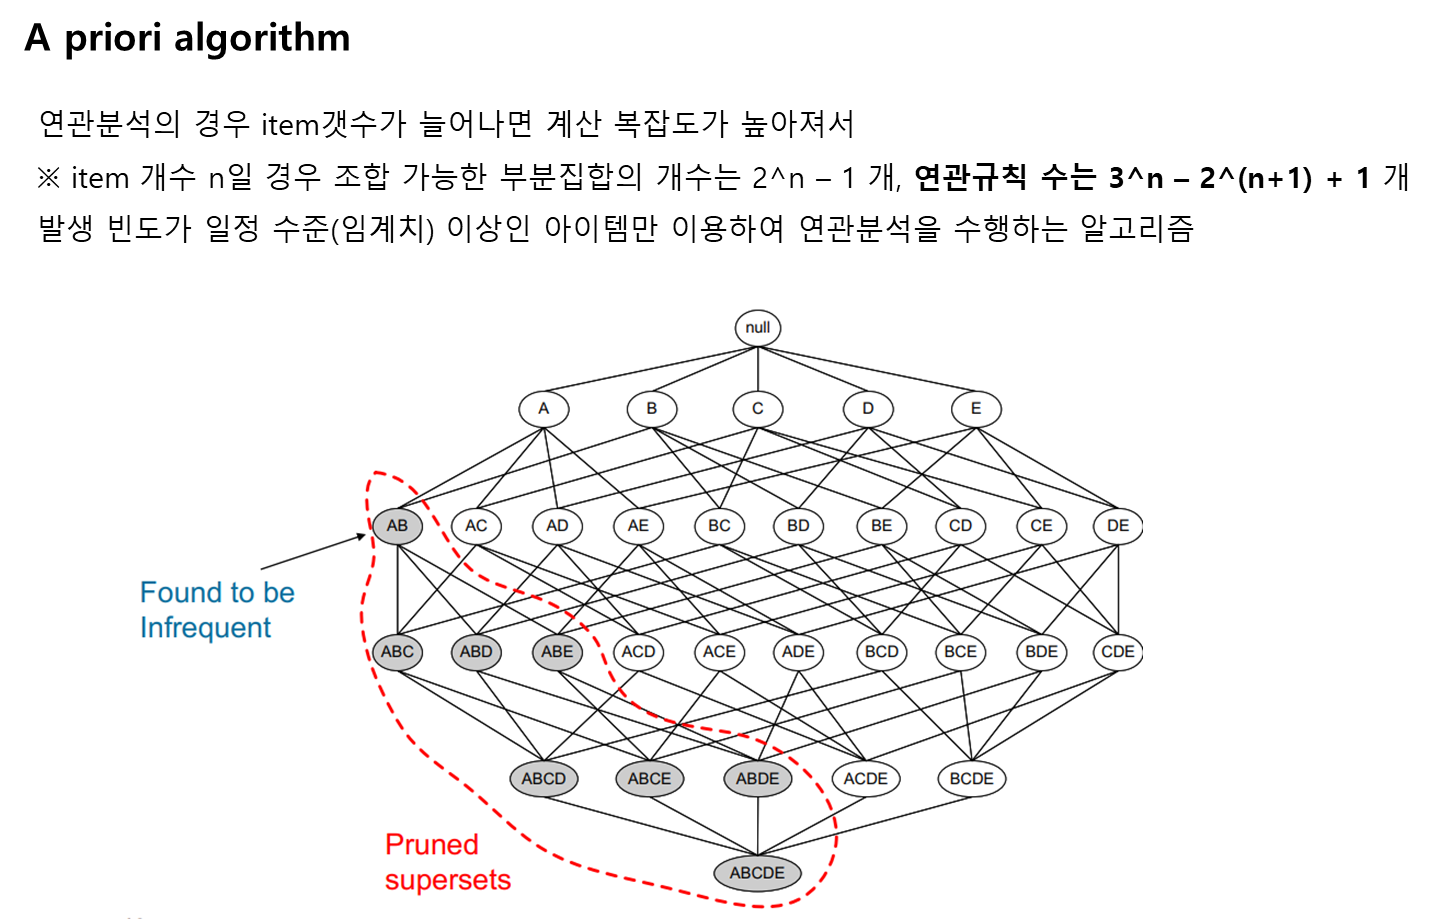

https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6

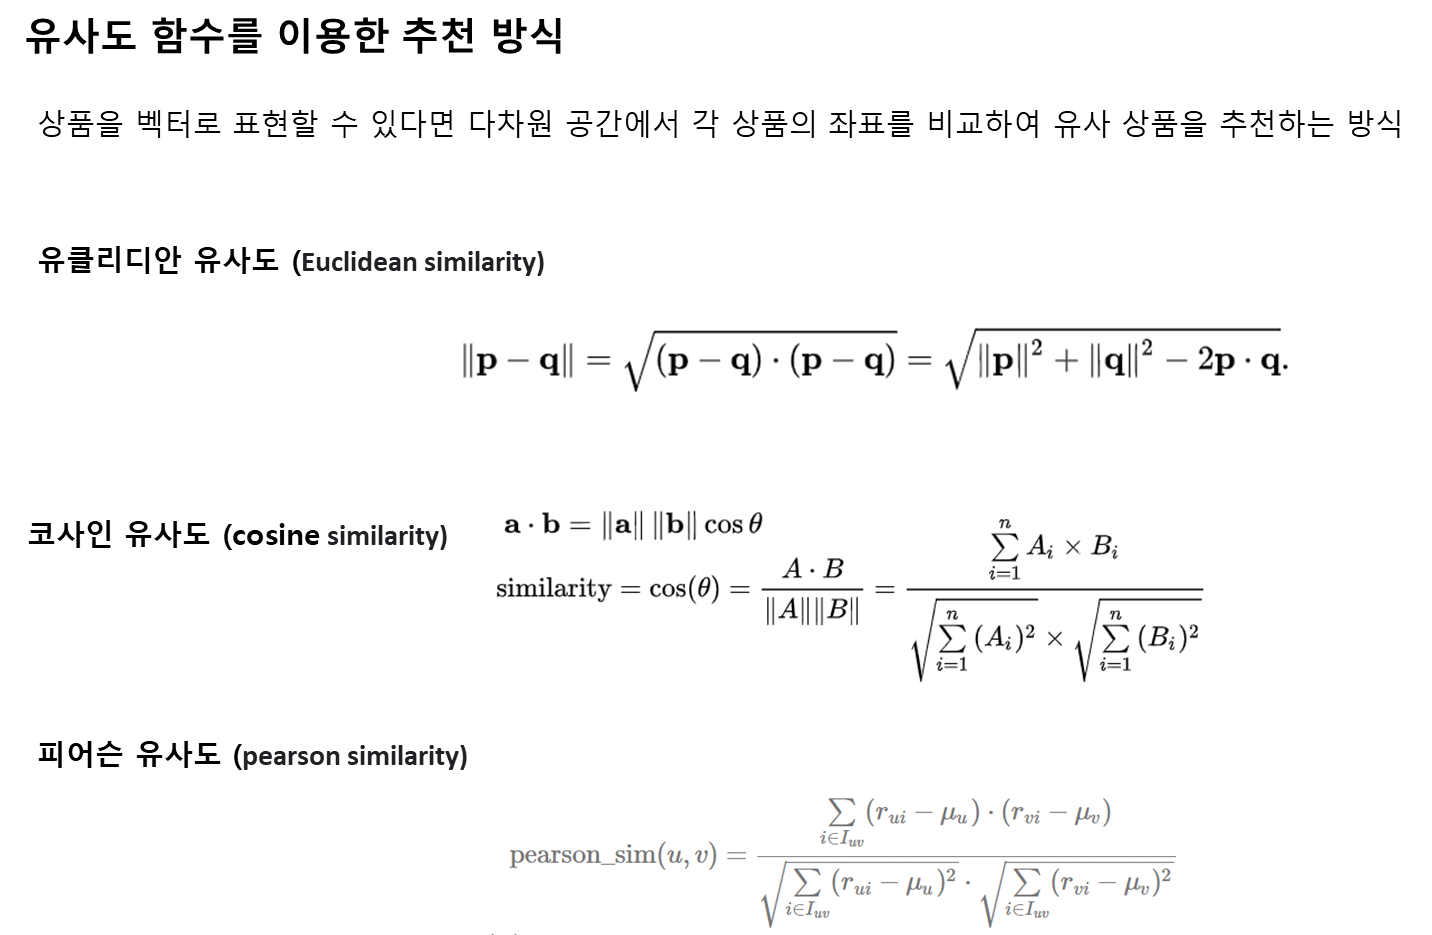

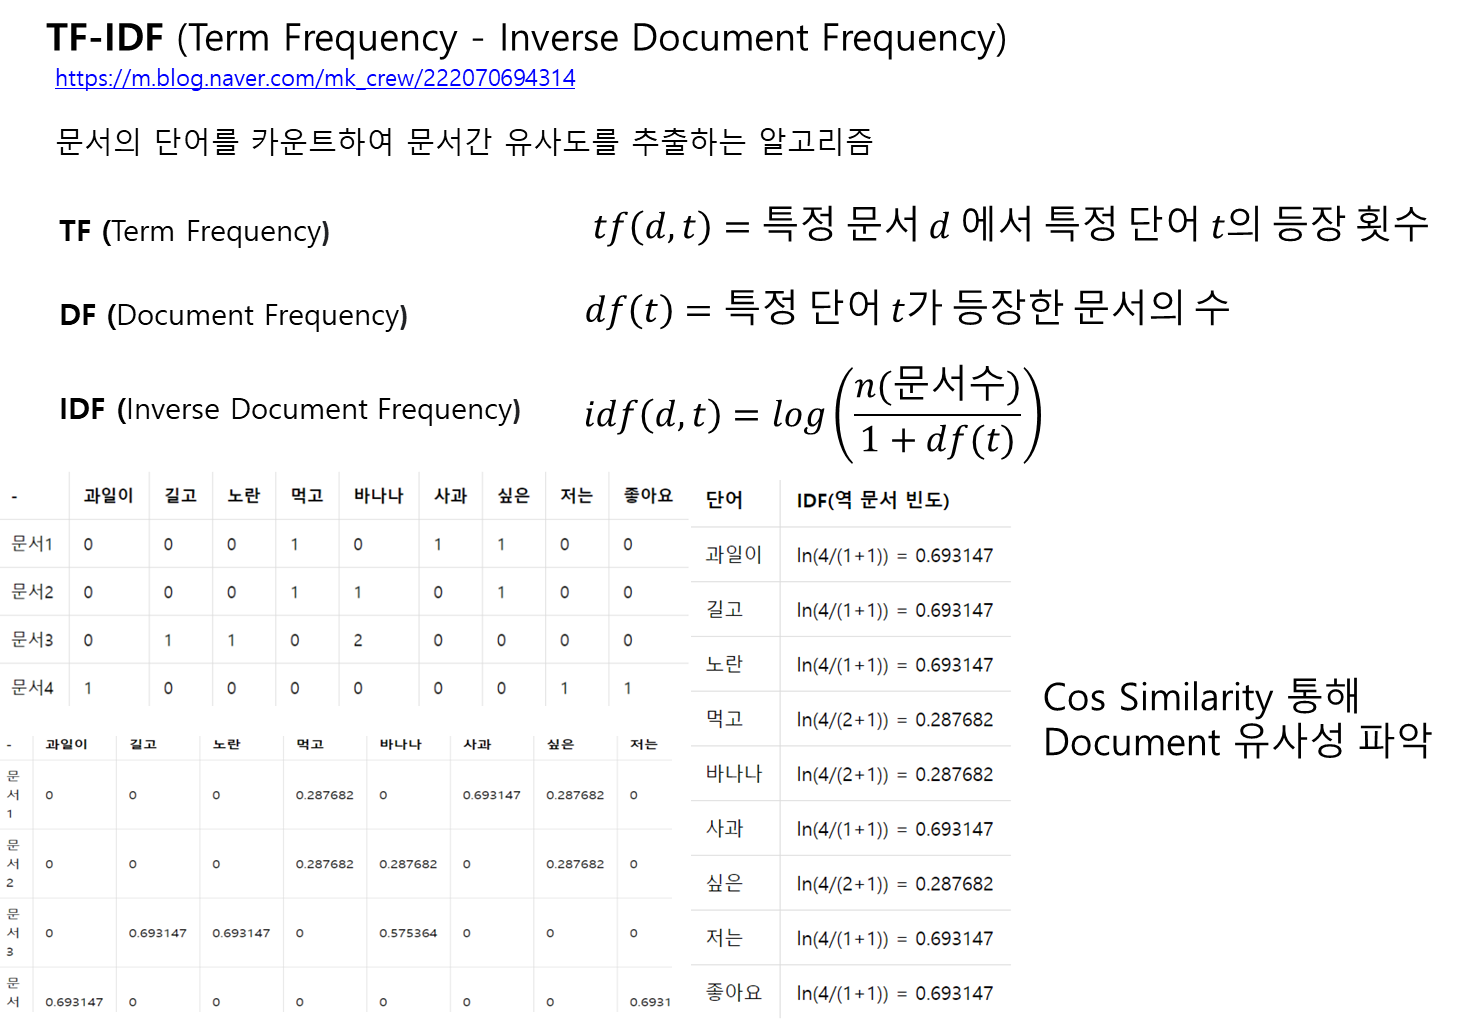

In [ ]:
# 필요한 라이브러리 설치
!pip install requests scikit-learn pandas

# 1. 문서 다운로드
import os
import requests

# URL에서 문서 다운로드 (샘플 텍스트 파일)
url = "https://www.gutenberg.org/files/11/11-0.txt"  # 앨리스의 이상한 나라의 모험 (Alice's Adventures in Wonderland)
response = requests.get(url)

# 다운로드 받은 데이터를 파일로 저장
os.makedirs("documents", exist_ok=True)
with open("documents/alice.txt", "w", encoding="utf-8") as f:
    f.write(response.text)

# 2. TF-IDF 계산
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서 읽기
with open("documents/alice.txt", "r", encoding="utf-8") as f:
    document = f.read()

# 문서를 작은 문단으로 분리 (TF-IDF에 적합하게 분리)
paragraphs = document.split("\n\n")  # 빈 줄 기준으로 문단 나눔

# TF-IDF 계산
vectorizer = TfidfVectorizer(stop_words="english", max_features=100)  # 상위 100개의 단어만 선택
X_tfidf = vectorizer.fit_transform(paragraphs)

# 3. TF-IDF 결과 정리
import pandas as pd

# TF-IDF 결과를 DataFrame으로 변환
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# 첫 번째 문단에서 TF-IDF 값 상위 단어 확인
tfidf_top = tfidf_df.iloc[0].sort_values(ascending=False).head(10)
print("\n첫 번째 문단에서 TF-IDF 값 상위 단어 10개:\n", tfidf_top)

# 전체 TF-IDF 데이터 확인
# ace_tools is an internal OpenAI library and not available for external use.
# Instead, we can use the display function from IPython.display or simply print the dataframe
display(tfidf_df) # Display the dataframe using IPython.display
# Alternatively, you can print the head of the dataframe:
# print(tfidf_df.head())

In [ ]:
# prompt: 위에서 만든 tf-idf 데이터를 이용해서 가장 유사한 문서 2개를 추출해서 출력

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 2. TF-IDF 계산 (이전 코드와 동일)
# ... (이전 코드에서 TF-IDF 계산 부분 복사) ...

# 유사도 계산 (코사인 유사도)
cosine_similarities = cosine_similarity(X_tfidf)

# 첫 번째 문서와 가장 유사한 문서 2개 찾기
first_doc_similarities = cosine_similarities[110]  # 첫 번째 문서의 유사도 벡터
similar_docs_indices = first_doc_similarities.argsort()[1:3] # 가장 유사한 2개 문서의 인덱스 (자기 자신 제외)

print ("첫 번째 문장 : " + paragraphs[110])

# 가장 유사한 문서 2개 출력
print("\n첫 번째 문서와 가장 유사한 문서 2개:")
for i in similar_docs_indices:
    print(f"문서 {i+1}: 유사도 {first_doc_similarities[i]:.4f}")
    print(paragraphs[i])
    print("-" * 20)

In [ ]:
# prompt: 110번째 문장과 유사도가 높다는 526 522 문서의 TF-IDF 출력해줘

# 필요한 라이브러리 import (이전 코드에서 이미 import 되었으므로 생략 가능)

# ... (이전 코드에서 TF-IDF 계산 부분 복사) ...

# 유사도 계산 (코사인 유사도)
cosine_similarities = cosine_similarity(X_tfidf)

# 110번째 문서와 가장 유사한 문서 2개 (526, 522번 문서)의 TF-IDF 출력
target_doc_index = 110  # 110번째 문서 (0부터 시작하므로 인덱스는 109)
similar_docs_indices = [526, 522]

print(f"\n110번째 문장과 유사도가 높은 문서 (526, 522)의 TF-IDF 값:")
for i in similar_docs_indices:
  try:
    print(f"\n문서 {i+1}:")
    # 문서 인덱스를 이용하여 tfidf_df에서 해당 문서의 TF-IDF 값을 가져옵니다.
    doc_tfidf = tfidf_df.iloc[i]
    # TF-IDF 값이 0보다 큰 항목만 출력
    print(doc_tfidf[doc_tfidf > 0])
  except IndexError:
    print(f"문서 {i+1}는 존재하지 않습니다.")